In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
import os

In [3]:
train_path='/home/deepaksr/project/project_assignment1/data3/SeekThermal/Train'
#valid_path='/home/deepaksr/project/project_assignment1/data/valid'
test_path='/home/deepaksr/project/project_assignment1/data3/SeekThermal/Test'
def verify_data(folder):
  for classes in os.listdir(folder):
    class_path=os.path.join(folder,classes)
    if os.path.isdir(class_path):
      images = [i for i in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,i))]
      counter = sum(1 for image in images if image.lower().endswith('.jpg'))
      print(f'class: {classes}')
      print(f'Images: {counter}\n')

print('Training Data:')
verify_data(train_path)
#print('Validation Data:')
#verify_data(valid_path)
print('Test Data:')
verify_data(test_path)

Training Data:
class: Man
Images: 1782

class: Cat
Images: 1168

class: Car
Images: 1782

Test Data:
class: car
Images: 356

class: cat
Images: 356

class: man
Images: 356



Data Augmentation using ImageDataGenerator & Data Generator using flow_from_directory 
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2024-09-04 21:39:43.771750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 21:39:43.792618: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 21:39:43.798896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 21:39:43.816973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 21:39:44.744694: W tensorflow/comp

In [5]:
datagen= ImageDataGenerator(rotation_range=10,width_shift_range=0.05,height_shift_range=0.05,
                            horizontal_flip=True, rescale=1.0/255, validation_split=0.2)
train_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True, subset='training')
val_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True, subset='validation')
test_generator = datagen.flow_from_directory(directory=test_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

print(train_generator.class_indices)
print(train_generator.samples)
print(val_generator.class_indices)
print(val_generator.samples)
print(test_generator.class_indices)
print(test_generator.samples)

Found 3787 images belonging to 3 classes.
Found 945 images belonging to 3 classes.
Found 1068 images belonging to 3 classes.
{'Car': 0, 'Cat': 1, 'Man': 2}
3787
{'Car': 0, 'Cat': 1, 'Man': 2}
945
{'car': 0, 'cat': 1, 'man': 2}
1068


Checking Shape of loaded data batches

In [6]:
x_train_batch, y_train_batch = next(train_generator)
x_valid_batch, y_valid_batch = next(val_generator)
x_test_batch, y_test_batch = next(test_generator)

print(f"Training batch shape: {x_train_batch.shape}, Labels shape: {y_train_batch.shape}")
print(f"Validation batch shape: {x_valid_batch.shape}, Labels shape: {y_valid_batch.shape}")
print(f"Test batch shape: {x_test_batch.shape}, Labels shape: {y_test_batch.shape}")

Training batch shape: (32, 300, 300, 3), Labels shape: (32, 3)
Validation batch shape: (32, 300, 300, 3), Labels shape: (32, 3)
Test batch shape: (32, 300, 300, 3), Labels shape: (32, 3)


Define the CNN using keras.models & keras.layers

In [6]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore

In [7]:
def get_model():
  net = Sequential()
  net.add(Conv2D(32,(3,3), activation = 'relu', padding='same', input_shape=(300,300,3)))
  net.add(MaxPooling2D((2,2)))
  net.add(Conv2D(128,(3,3), activation='relu', padding='same'))
  net.add(MaxPooling2D((2,2)))
  net.add(Dropout(0.25))
  net.add(Flatten())
  net.add(Dense(512, activation='relu'))
  net.add(Dense(256, activation='relu'))
  net.add(Dropout(0.25))
  net.add(Dense(3, activation='softmax'))
  net.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

In [8]:
model=get_model()
model.summary()

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-04 21:40:07.437852: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 720000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   368,640,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,810,499 (1.37 GB)

 Trainable params: 368,810,499 (1.37 GB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725466239.362686 2971441 service.cc:146] XLA service 0x7fbbb8003a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725466239.362728 2971441 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-04 21:40:39.421418: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-04 21:40:39.667242: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  1/119 ━━━━━━━━━━━━━━━━━━━━ 30:27 15s/step - accuracy: 0.3125 - loss: 1.1151

I0000 00:00:1725466245.195959 2971441 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 60/119 ━━━━━━━━━━━━━━━━━━━━ 49s 843ms/step - accuracy: 0.5427 - loss: 7.4866

2024-09-04 21:41:39.211380: W external/local_xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 4.25GiB (4559533739 bytes) by rematerialization; only reduced to 5.53GiB (5936182960 bytes), down from 5.53GiB (5936183216 bytes) originally


119/119 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6221 - loss: 4.7957 - val_accuracy: 0.6772 - val_loss: 0.8907
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 949ms/step - accuracy: 0.8543 - loss: 0.3907 - val_accuracy: 0.6794 - val_loss: 0.9402
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 117s 932ms/step - accuracy: 0.8973 - loss: 0.2684 - val_accuracy: 0.6910 - val_loss: 1.1258
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 118s 944ms/step - accuracy: 0.9296 - loss: 0.2023 - val_accuracy: 0.7016 - val_loss: 1.4204
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 118s 943ms/step - accuracy: 0.9398 - loss: 0.1581 - val_accuracy: 0.7048 - val_loss: 1.5802
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 117s 937ms/step - accuracy: 0.9645 - loss: 0.1075 - val_accuracy: 0.7069 - val_loss: 1.4828
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 950ms/step - accuracy: 0.9526 - loss: 0.1135 - val_accuracy: 0.6688 - val_loss: 1.6678
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 946ms/step - accuracy: 0.9586 - loss: 0.1102 

In [10]:
history_dict = history.history

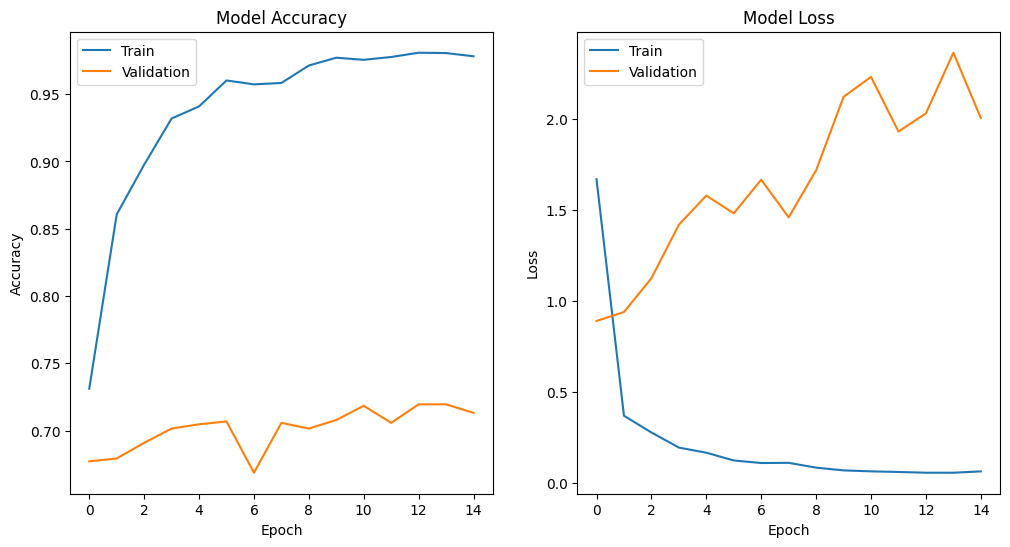

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [12]:
import numpy as np
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 939ms/step
[0 0 0 ... 2 2 2]


array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [13]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.8755
Precision : 0.9026
Recall : 0.8755
F1 Score : 0.8724
Classification Report:
               precision    recall  f1-score   support

         car       0.99      0.98      0.98       356
         cat       0.98      0.66      0.79       356
         man       0.74      0.99      0.85       356

    accuracy                           0.88      1068
   macro avg       0.90      0.88      0.87      1068
weighted avg       0.90      0.88      0.87      1068



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[348   4   4]
 [  2 234 120]
 [  2   1 353]]


CNN with different Architecture

In [15]:
def get_CNN():
  net=Sequential()
  net.add(Conv2D(32,(5,5),activation='relu', input_shape=(300,300,3)))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(64,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(128,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(256,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Dropout(0.25))
  net.add(Conv2D(512,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Flatten())
  net.add(Dense(512, activation='relu'))
  net.add(Dense(128, activation='relu'))
  net.add(Dropout(0.25))
  net.add(Dense(3, activation='softmax'))
  net.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

In [16]:
model=get_CNN()
model.summary()

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 296, 296, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,481,731 (55.24 MB)

 Trainable params: 14,481,731 (55.24 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6052 - loss: 0.8139 - val_accuracy: 0.7312 - val_loss: 0.6869
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 122s 973ms/step - accuracy: 0.8859 - loss: 0.3111 - val_accuracy: 0.7481 - val_loss: 0.6579
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 120s 954ms/step - accuracy: 0.9098 - loss: 0.2605 - val_accuracy: 0.7852 - val_loss: 0.5754
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 951ms/step - accuracy: 0.9364 - loss: 0.1966 - val_accuracy: 0.7450 - val_loss: 0.8561
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 117s 932ms/step - accuracy: 0.9557 - loss: 0.1319 - val_accuracy: 0.7598 - val_loss: 0.7585
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 121s 965ms/step - accuracy: 0.9633 - loss: 0.1181 - val_accuracy: 0.7545 - val_loss: 0.7086
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 118s 947ms/step - accuracy: 0.9627 - loss: 0.1187 - val_accuracy: 0.7132 - val_loss: 1.1454
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 956ms/step - accuracy: 0.9621 - lo

In [18]:
history_dict = history.history

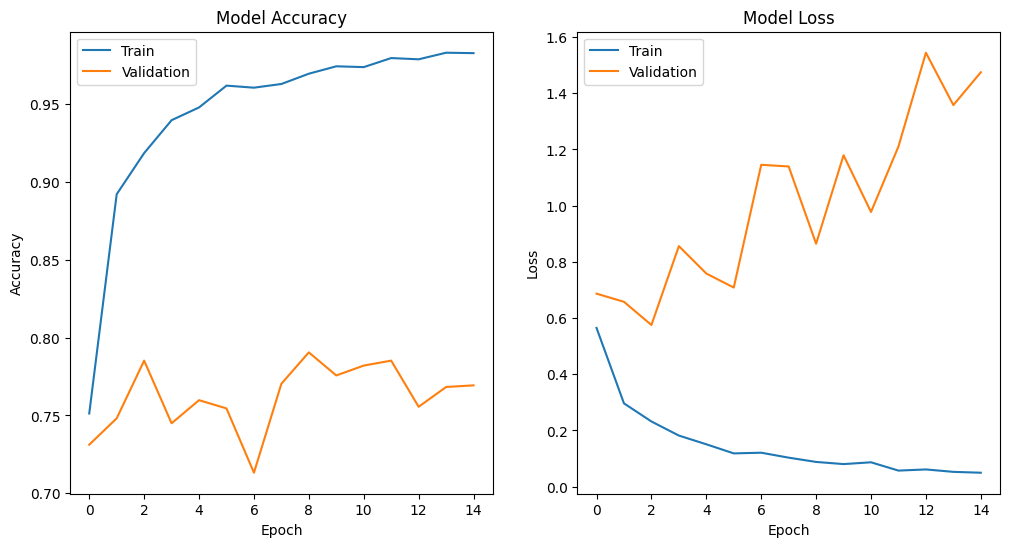

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [20]:
import numpy as np
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 944ms/step
[0 0 2 ... 2 2 2]


array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [21]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.9448
Precision : 0.9502
Recall : 0.9448
F1 Score : 0.9447
Classification Report:
               precision    recall  f1-score   support

         car       0.99      0.99      0.99       356
         cat       0.99      0.86      0.92       356
         man       0.87      0.99      0.93       356

    accuracy                           0.94      1068
   macro avg       0.95      0.94      0.94      1068
weighted avg       0.95      0.94      0.94      1068



In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[351   0   5]
 [  3 306  47]
 [  2   2 352]]
